In [1]:
%pylab inline
import GPyOpt
import GPy
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
func = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

In [3]:
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1.5,1.5)}]

In [4]:
constraints = [{'name': 'constr_1', 'constraint': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
              {'name': 'constr_2', 'constraint': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [5]:
feasible_region = GPyOpt.Design_space(space = space, constraints = constraints)

Text(0.5, 1.0, 'Six-Hump Camel function')

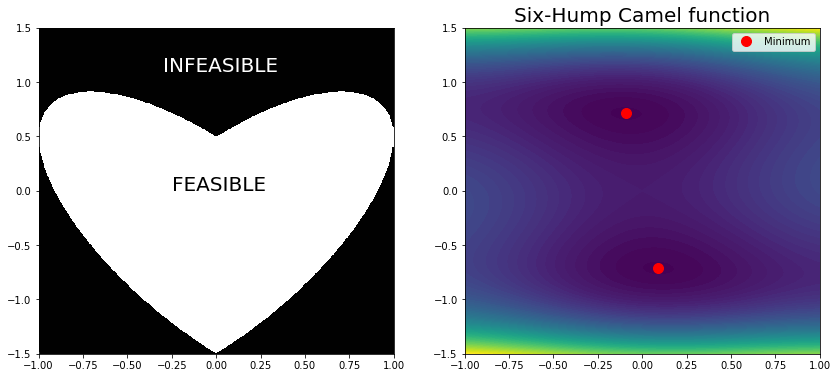

In [6]:
## Grid of points to make the plots
grid = 400
bounds = feasible_region.get_continuous_bounds()
X1 = np.linspace(bounds[0][0], bounds[0][1], grid)
X2 = np.linspace(bounds[1][0], bounds[1][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

## Check the points in the feasible region.
masked_ind = feasible_region.indicator_constraints(X).reshape(grid,grid)
masked_ind = np.ma.masked_where(masked_ind > 0.5, masked_ind)
masked_ind[1,1]=1

## Make the plots
plt.figure(figsize=(14,6))

# Feasible region
plt.subplot(121)
plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=1,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20)
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')

plt.subplot(122)
plt.plot()
plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100, alpha=1,origin ='lower')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.legend()
plt.title('Six-Hump Camel function',size=20)

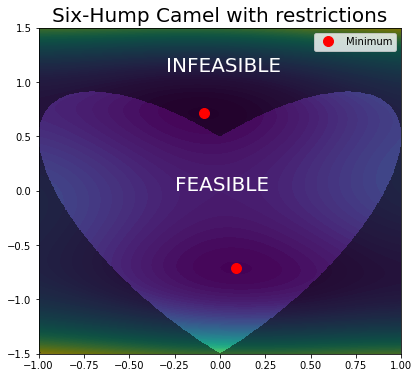

In [7]:
plt.figure(figsize=(6.5,6))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.title('Six-Hump Camel with restrictions',size=20)
plt.legend()


In [8]:
# --- CHOOSE the intial design
from numpy.random import seed # fixed seed
seed(123456)

initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)


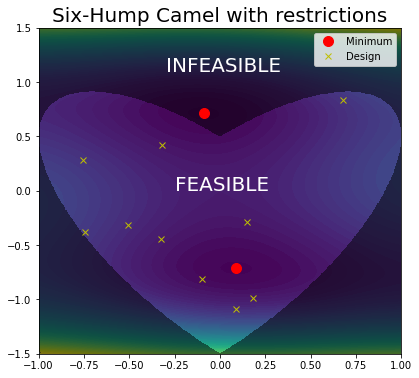

In [9]:
plt.figure(figsize=(6.5,6))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.title('Six-Hump Camel with restrictions',size=20)
plt.plot(initial_design[:,0],initial_design[:,1],'yx',label = 'Design')
plt.legend()

In [10]:
# --- CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(func.f)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

# --- CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [11]:
# BO object
bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

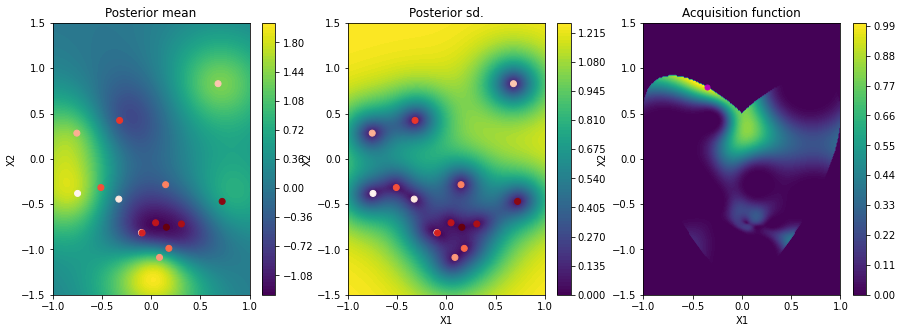

In [12]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
bo.plot_acquisition()

In [13]:
# Run the optimization  
max_iter  = 25
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 

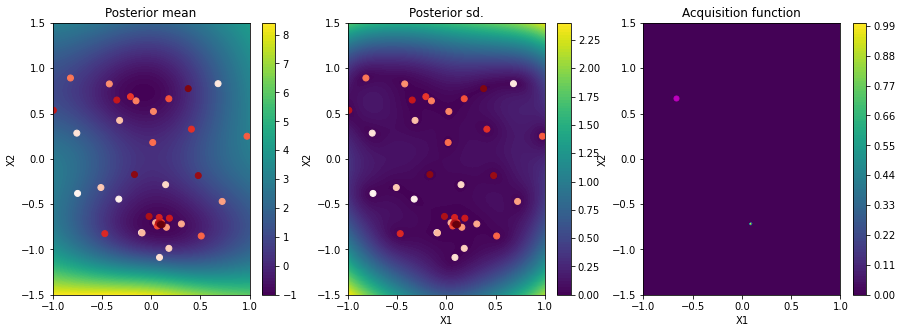

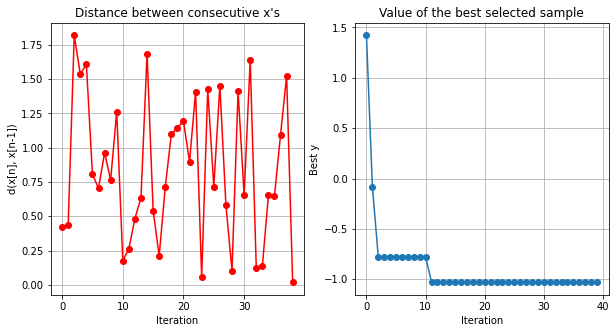

In [14]:
bo.plot_acquisition()
bo.plot_convergence()


In [16]:
# Best found value
np.round(bo.x_opt,2)

array([ 0.09, -0.71])

In [17]:
# True min
np.round(func.min[0],2)

array([ 0.09, -0.71])